In [1]:
#필요한 패키지 라이브러리 
import pandas as pd
import numpy as np
import re
import time
import datetime
from wordcloud import WordCloud, ImageColorGenerator
from nltk.stem import LancasterStemmer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#데이터 로드
df = pd.read_csv('all_review_.csv')
df

,Unnamed: 0,STAR,CONTENT
0,0,5,Seoul tower is very peacfull and one of clean ...
1,1,4,We have walked up and down It is a good walk ...
2,2,4,It was a bit late to open and it was raining ...
3,3,5,It was nice to be able to see the beautiful n...
4,4,5,Got there at dusk By the time we got into the ...
...,...,...,...
15460,15466,5,Dream of a very well planned place
15461,15467,5,Christmas organized the event very beautifully
15462,15468,4,Wow
15463,15469,5,Excelente experiencia


In [3]:
#결측데이터확인
df.isnull().sum()

Unnamed: 0    0
STAR          0
CONTENT       0
dtype: int64

In [4]:
#불용어 추가
stop_words = set(stopwords.words('english'))
add_stop_words = ["shop","area","time","cable","car","'", ",", "'s", ":", ".", "?", "!","(",")","n't","korea","korean","good","like","awesome","perfect","nice","also","well","expensive","seoul","beautiful","wonderful","view","views","city","place","visit","tower","just","lotte","world","went","lotte","tower","street","lot","lots","ddp","insadong","places","bookstore","bookstores","kyobo","lotte","aquarium","feel","animals","park","animals","coex","mall","great","pretty","best","go","see","really","many"]
for word in add_stop_words:
    stop_words.add(word)

In [5]:
text = df[['CONTENT']]

#토큰화
text['CONTENT'] = text.apply(lambda row: nltk.word_tokenize(row['CONTENT']), axis=1)

#불용어 처리
text['CONTENT'] = text['CONTENT'].apply(lambda x: [word.lower() for word in x])
text['CONTENT'] = text['CONTENT'].apply(lambda x: [word for word in x if word not in (stop_words)])
#표제어 추출
text['CONTENT'] = text['CONTENT'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27756\35457360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['CONTENT'] = text.apply(lambda row: nltk.word_tokenize(row['CONTENT']), axis=1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27756\35457360.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['CONTENT'] = text['CONTENT'].apply(lambda x: [word.lower() for word in x])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27756\35457360.py:8: SettingWithCopyWarning: 

In [6]:
text['CONTENT']

0        [peacfull, one, clean, life, fantastic, garden...
1        [walk, walk, one, side, stairs, path, forest, ...
2        [bite, late, open, rain, hard, wait, outside, ...
3                                            [able, night]
4        [get, dusk, get, top, dark, would, better, get...
                               ...                        
15460                                        [dream, plan]
15461            [christmas, organize, event, beautifully]
15462                                                [wow]
15463                             [excelente, experiencia]
15464                                [people, take, night]
Name: CONTENT, Length: 15465, dtype: object

In [7]:
#nltk tag로 명사 추출
num=0
noun_word=[[] for i in range(len(text['CONTENT']))]
for i in text['CONTENT']:
    review_tag=nltk.pos_tag(i)
    for j in range(len(review_tag)):
        if review_tag[j][1]=='NNP' or review_tag[j][1]=='NNS' or review_tag[j][1]=='NN'or review_tag[j][1]=='NNPS':
            if review_tag[j][0] not in stop_words:
                noun_word[num].append(review_tag[j][0])
    num+=1
        
noun_word        

[['peacfull', 'life', 'garden', 'tree', 'book', 'list', 'spend'],
 ['walk', 'side', 'path', 'visibility', 'bite', 'cloudy', 'weather'],
 ['bite', 'rain', 'wait'],
 ['night'],
 ['dark', 'foothills', 'bus', 'wouldnt', 'stun'],
 ['mother', 'children', 'night', 'weekend', 'visitors'],
 ['years', 'joke', 'offer', 'attractions', 'palaces', 'anything'],
 ['overlook'],
 ['cool',
  'weather',
  'convenient',
  'walk',
  'morning',
  'exercise',
  'cafe',
  'space'],
 ['landmarks'],
 ['eat', 'pork', 'cutlet', 'date'],
 ['point', 'worth'],
 ['koreas',
  'transmission',
  'beam',
  'television',
  'radio',
  'broadcast',
  'capital',
  'become'],
 ['doubledecker', 'bus', 'look'],
 ['buran'],
 ['ride'],
 ['aju', 'joa'],
 ['option', 'way', 'plenty', 'grab', 'something', 'eat'],
 ['library', 'morning', 'minutes'],
 ['hike', 'plenty', 'restoraunts', 'experinece', 'right'],
 ['dont', 'walk', 'im', 'stairs'],
 ['think'],
 ['favorite'],
 ['location', 'sit', 'town'],
 ['relax', 'chill', 'summer', 'myeongd

In [8]:
from gensim import corpora, models
import gensim

In [9]:
high_score_reviews=noun_word

In [10]:
high_score_reviews=[[y for y in x if not len(y)==1] for x in high_score_reviews]
dictionary =  corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]
# 출현빈도가 적거나 자주 등장하는 단어는 제거
#dictionary.filter_extremes(no_below=10, no_above=0.05)


In [11]:
#coherence 값 확인
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(1,10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i,id2word=dictionary)
    coherence_model_lda=CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

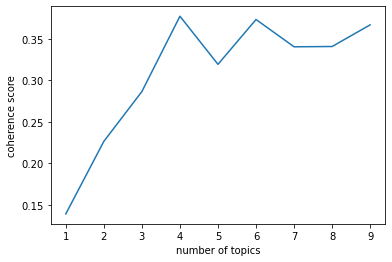

In [12]:
x=range(1,10)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [13]:
len(noun_word)

15465

In [14]:
perplexity_values=[]
for i in range(1,10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i,id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

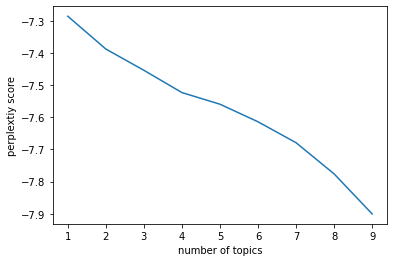

In [15]:
x=range(1,10)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplextiy score")
plt.show()

In [16]:
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=4,alpha=0.1,id2word=dictionary)

In [17]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.013*"zoo" + 0.011*"day" + 0.010*"station" + 0.009*"area" + 0.009*"walk" + 0.008*"fun" + 0.008*"ticket" + 0.008*"aquariums" + 0.008*"restaurants" + 0.007*"get" + 0.007*"center" + 0.007*"store" + 0.007*"night" + 0.007*"price" + 0.007*"use" + 0.006*"children" + 0.006*"palace" + 0.006*"ride" + 0.006*"entrance" + 0.006*"village"'),
 (1,
  '0.016*"area" + 0.016*"design" + 0.015*"house" + 0.014*"food" + 0.013*"night" + 0.013*"tank" + 0.011*"day" + 0.011*"tea" + 0.011*"look" + 0.009*"variety" + 0.009*"experience" + 0.009*"fish" + 0.008*"restaurants" + 0.008*"fun" + 0.007*"sea" + 0.007*"hours" + 0.007*"friends" + 0.007*"creatures" + 0.007*"love" + 0.007*"people"'),
 (2,
  '0.013*"people" + 0.013*"walk" + 0.011*"food" + 0.010*"way" + 0.009*"kid" + 0.008*"weekend" + 0.008*"children" + 0.008*"day" + 0.008*"restaurants" + 0.007*"line" + 0.007*"eat" + 0.007*"vendors" + 0.007*"family" + 0.006*"enjoy" + 0.006*"exhibition" + 0.006*"shark" + 0.006*"area" + 0.005*"streets" + 0.005*"market" + 0.

In [18]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(ldamodel,corpus,dictionary)
vis

C:\Users\jiu14\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.043838 -0.006646       1        1  31.902100
0     -0.092016 -0.090404       2        1  26.656543
3     -0.024543  0.130726       3        1  25.225730
1      0.160396 -0.033676       4        1  16.215628, topic_info=           Term        Freq        Total Category  logprob  loglift
1474      house  595.000000   595.000000  Default  30.0000  30.0000
388      design  476.000000   476.000000  Default  29.0000  29.0000
3726        zoo  546.000000   546.000000  Default  28.0000  28.0000
223   souvenirs  823.000000   823.000000  Default  27.0000  27.0000
6191       tank  329.000000   329.000000  Default  26.0000  26.0000
...         ...         ...          ...      ...      ...      ...
159       enjoy  138.415169   763.325160   Topic4  -5.1734   0.1118
139      people  160.249093  1595.615158   Topic4  -5.0270  -0.4791
157      family  118.329995   591.148982   Topic4  -5.3302   0.2106
162       price  117.689998  1256.532466   Topic4  -5.3356  -0.5489
245    interest  114.936317  1149.173167   Topic4  -5.3593  -0.4832

[318 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3341      1  0.063281  accessories
3341      4  0.928122  accessories
1037      1  0.397011   activities
1037      3  0.007218   activities
1037      4  0.591907   activities
...     ...       ...          ...
31        4  0.067642        years
3726      1  0.001830          zoo
3726      2  0.946030          zoo
3726      3  0.049406          zoo
3726      4  0.001830          zoo

[609 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [20]:
'''num_topic=3
keywordlist=[[] for i in range(num_topic)]
for i in range(num_topic):
    kk=ldamodel.show_topic(i,topn=15)
    kk2=list(kk)
    keywordlist.append(kk2)'''
kk=ldamodel.show_topic(0,topn=15)
kk2=pd.DataFrame(kk)
keyword1=kk2[0]

kk=ldamodel.show_topic(1,topn=15)
kk2=pd.DataFrame(kk)
keyword2=kk2[0]

kk=ldamodel.show_topic(2,topn=15)
kk2=pd.DataFrame(kk)
keyword3=kk2[0]

kk=ldamodel.show_topic(3,topn=15)
kk2=pd.DataFrame(kk)
keyword4=kk2[0]

KEYWORD=pd.DataFrame([keyword1,keyword2,keyword3,keyword4],index=['Topic 1','Topic 2','Topic 3','Topic 4']).transpose()


In [21]:
KEYWORD

,Topic 1,Topic 2,Topic 3,Topic 4
0,zoo,area,people,area
1,day,design,walk,walk
2,station,house,food,food
3,area,food,way,interest
4,walk,night,kid,souvenirs
5,fun,tank,weekend,restaurants
6,ticket,day,children,price
7,aquariums,tea,day,people
8,restaurants,look,restaurants,things
9,get,variety,line,market


In [31]:
def make_topictable_per_doc(ldamodel,corpus):
    topic_table=pd.DataFrame()
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc=topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc,key=lambda x: (x[1]), reverse=True)
        for j,(topic_num,prop_topic) in enumerate(doc):
            if j == 0:
                topic_table=topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),ignore_index=True)
            else:
                break
    return(topic_table)

In [32]:
topictable=make_topictable_per_doc(ldamodel,corpus)
topictable=topictable.reset_index()
topictable.columns=['문서 번호','가장 비중이 높은 토픽','가장 높은 토픽의 비중','각 토픽의 비중']
topictable

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27756\1678881553.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table=topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),ignore_index=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27756\1678881553.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table=topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),ignore_index=True)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,2,0.9589,"[(0, 0.013713636), (1, 0.013708838), (2, 0.958..."
1,1,3,0.9594,"[(0, 0.0135233505), (1, 0.013522535), (2, 0.01..."
2,2,3,0.9117,"[(0, 0.029421987), (1, 0.029418478), (2, 0.029..."
3,3,1,0.7857,"[(0, 0.07144712), (1, 0.7856732), (2, 0.071442..."
4,4,0,0.9434,"[(0, 0.94336295), (1, 0.018878883), (2, 0.0188..."
...,...,...,...,...
15460,15460,2,0.8749,"[(0, 0.04168123), (1, 0.041689202), (2, 0.8749..."
15461,15461,2,0.8750,"[(0, 0.04167378), (1, 0.04167364), (2, 0.87498..."
15462,15462,2,0.7857,"[(0, 0.07144384), (1, 0.07145341), (2, 0.78565..."
15463,15463,1,0.8749,"[(0, 0.041712884), (1, 0.87486136), (2, 0.0417..."


In [34]:
topictable.to_csv("topic_table.csv")